In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact
import glob
import os
import geopandas as gpd
from plotnine import *
import matplotlib.dates as mdates
import numpy as np
from plotnine import ggplot, aes, geom_line, geom_point, theme_bw, labs
from scipy.interpolate import PchipInterpolator

# Results Visualization: Time series of Yield

In [2]:
results = pd.read_parquet("/workspace/workflow/_6EvaluationNotebooks/results.parquet", engine="fastparquet")

In [3]:
results.columns

Index(['Clock.Today', 'Yield', 'Nitrogen', 'id_cell', 'id_within_cell',
       'MaizeYield', 'SoyBeanYield', 'ISoilWater.LeachNO3'],
      dtype='object')

In [5]:
results = pd.read_parquet("/workspace/calibration/_6EvaluationNotebooks/results.parquet", engine="fastparquet")

results["Clock.Today"] = pd.to_datetime(results["Clock.Today"])

possible_vars = ['MaizeYield','SoyBeanYield','Yield','ISoilWater.LeachNO3']

@interact(variable=possible_vars)
def plot_variable(variable="SurfaceOrganicMatter.Cover"):
    pivot_df = results.pivot_table(
        index="Clock.Today",
        columns="Nitrogen",
        values=variable,
        aggfunc="max"
    )

    plt.figure(figsize=(12, 6))
    for col in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[col], label=f"Nitrogen {col}")

    # Force all years on x-axis
    years = pd.DatetimeIndex(pivot_df.index).year.unique()
    plt.xticks(pd.to_datetime([f'{year}-01-01' for year in years]), years, rotation=45)

    plt.xlabel("Year")
    plt.ylabel(variable)
    plt.title(f"{variable} over time")
    plt.legend(title="Simulation", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


interactive(children=(Dropdown(description='variable', options=('MaizeYield', 'SoyBeanYield', 'Yield', 'ISoilW…

# PAPER FIGURES

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact
import matplotlib.dates as mdates
from plotnine import *
import geopandas as gpd
import glob
import numpy as np
from scipy.interpolate import make_interp_spline
pd.set_option('display.max_rows', 500)
results = pd.read_parquet("/workspace/calibration/_6EvaluationNotebooks/results.parquet", engine="fastparquet")
results["Clock.Today"] = pd.to_datetime(results["Clock.Today"])
results['Year'] = results['Clock.Today'].dt.year
idx = results.groupby(['id_GTD', 'Nitrogen','Year'])['Yield'].idxmax()
results = results.loc[idx].reset_index(drop=True)
results

Clock.Today      Yield  Nitrogen        id_GTD  MaizeYield  SoyBeanYield  \
0    2009-08-28   5.573163         0     0_2009_N0    5573.163           0.0   
1    2009-08-28   9.605165       100   0_2009_N100    9605.165           0.0   
2    2009-08-28  13.010377       200   0_2009_N200   13010.377           0.0   
3    2009-08-28  14.019876       300   0_2009_N300   14019.876           0.0   
4    2006-09-09  15.059333         0    10_2006_N0   15059.333           0.0   
5    2006-09-09  16.862360       100  10_2006_N100   16862.360           0.0   
6    2006-09-09  16.887375       200  10_2006_N200   16887.375           0.0   
7    2006-09-09  16.887375       300  10_2006_N300   16887.375           0.0   
8    2008-09-12  12.897047         0    10_2008_N0   12897.047           0.0   
9    2008-09-12  15.768948       100  10_2008_N100   15768.948           0.0   
10   2008-09-12  17.902246       200  10_2008_N200   17902.246           0.0   
11   2008-09-12  17.902246       300  10_2008_N300   17902.246           0.0   
12   2012-08-25   8.510974         0    10_2012_N0    8510.974           0.0   
13   2012-08-25  11.465158       100  10_2012_N100   11465.158           0.0   
14   2012-08-25  12.094997       200  10_2012_N200   12094.997           0.0   
15   2012-08-25  12.236184       300  10_2012_N300   12236.184           0.0   
16   2014-09-07  12.612578         0    10_2014_N0   12612.578           0.0   
17   2014-09-07  16.962433       100  10_2014_N100   16962.433           0.0   
18   2014-09-07  17.310651       200  10_2014_N200   17310.651           0.0   
19   2014-09-07  17.310651       300  10_2014_N300   17310.651           0.0   
20   2006-09-05   7.667631         0    12_2006_N0    7667.631           0.0   
21   2006-09-05  11.725578       100  12_2006_N100   11725.578           0.0   
22   2006-09-05  16.541172       200  12_2006_N200   16541.172           0.0   
23   2006-09-05  16.587781       300  12_2006_N300   16587.781           0.0   
24   2008-09-04   5.379731         0    13_2008_N0    5379.731           0.0   
25   2008-09-04   9.333245       100  13_2008_N100    9333.245           0.0   
26   2008-09-04  14.040901       200  13_2008_N200   14040.901           0.0   
27   2008-09-04  18.188942       300  13_2008_N300   18188.942           0.0   
28   2010-08-20   5.904077         0    13_2010_N0    5904.077           0.0   
29   2010-08-20   9.535355       100  13_2010_N100    9535.355           0.0   
30   2010-08-20  14.905965       200  13_2010_N200   14905.965           0.0   
31   2010-08-20  18.985549       300  13_2010_N300   18985.549           0.0   
32   2012-08-23   5.652936         0    13_2012_N0    5652.936           0.0   
33   2012-08-23   9.999454       100  13_2012_N100    9999.454           0.0   
34   2012-08-23  15.947797       200  13_2012_N200   15947.797           0.0   
35   2012-08-23  17.456622       300  13_2012_N300   17456.622           0.0   
36   2014-08-30   6.368476         0    13_2014_N0    6368.476           0.0   
37   2014-08-30  10.740708       100  13_2014_N100   10740.708           0.0   
38   2014-08-30  15.934845       200  13_2014_N200   15934.845           0.0   
39   2014-08-30  17.838933       300  13_2014_N300   17838.933           0.0   
40   2007-08-23   6.703613         0    14_2007_N0    6703.613           0.0   
41   2007-08-23  10.563997       100  14_2007_N100   10563.997           0.0   
42   2007-08-23  15.912560       200  14_2007_N200   15912.560           0.0   
43   2007-08-23  17.444267       300  14_2007_N300   17444.267           0.0   
44   2009-09-10   8.511711         0    14_2009_N0    8511.711           0.0   
45   2009-09-10  12.261114       100  14_2009_N100   12261.114           0.0   
46   2009-09-10  17.221019       200  14_2009_N200   17221.019           0.0   
47   2009-09-10  18.604973       300  14_2009_N300   18604.973           0.0   
48   2011-08-23   4.715483         0    14_2011_N0    4715.483           0.0   
49  

In [ ]:


GTD=pd.read_csv("/workspace/calibration/_1GTDtransform/GTDtransform.csv")

folder = "/workspace/calibration/_2FieldSelection"
geojson_file = glob.glob(os.path.join(folder, "*.geojson"))
fields=gpd.read_file(geojson_file[0])
fields_region=fields[['id_GTD','region']]
fields_region_indexed = fields_region.set_index(['id_GTD'])

# Preparing Simulations
results['Year'] = results['Clock.Today'].dt.year
idx = results.groupby(['id_GTD', 'Nitrogen','Year'])['Yield'].idxmax()
results = results.loc[idx].reset_index(drop=True)

## Selecting important variables
results = results[['id_GTD','Nitrogen','Yield','Year','MaizeYield']]

results_region = results.join(fields_region_indexed, on=['id_GTD'])

mask_c= (results_region['region'] == 'C') & (results_region['Year'] < 2014)
## Deleting years 2019 and 2020 (No have GTD for these years)

mask_other= (results_region['region'] != 'C') & (results_region['Year'] < 2019)

results_region_filtered_c= results_region[mask_c]
results_region_filtered_other= results_region[mask_other]

results_region_filtered=results_region_filtered_c.merge(results_region_filtered_other,how='outer')

# Selecting only the years where corn was produced
results_region_filtered=results_region_filtered[results_region_filtered['MaizeYield']!=0]

mask_GTD=(GTD['year'] < 2019) 
GTD_filtered = GTD[mask_GTD]
GTD_filtered['Yield'] = GTD_filtered['yield_ton']  


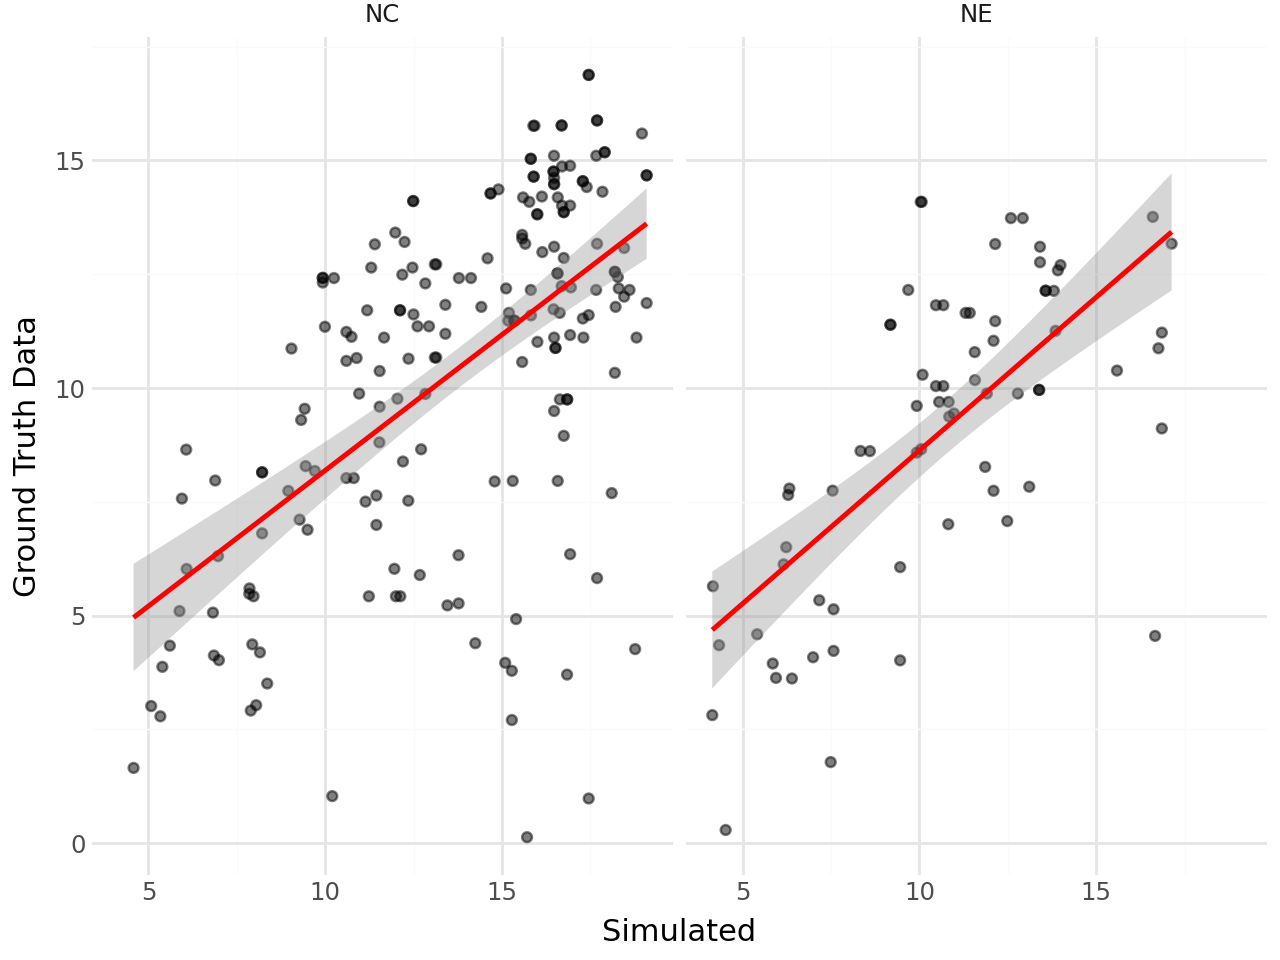

In [ ]:
all=pd.merge(results_region_filtered,GTD_filtered,on='id_GTD',how='inner')

scatter_comparison = (
    ggplot(all, aes(x='Yield_x', y='Yield_y')) +
    geom_point(alpha=0.5) + 
    geom_smooth(method='lm', color='red') + 
    facet_wrap('~region_x') +
    labs(x='Simulated',y='Ground Truth Data')+
    theme_minimal()
)
scatter_comparison

In [4]:
aoi_fields=gpd.read_file("/workspace/workflow/_6EvaluationNotebooks/cells_indiana.geojson")
aoi_fields = aoi_fields.loc[:, ~aoi_fields.columns.duplicated()]

import folium

# Crear mapa centrado en la media de las geometrías
centroid = aoi_fields.geometry.centroid
m = folium.Map(
    location=[centroid.y.mean(), centroid.x.mean()],
    zoom_start=12,
    tiles=None
)

# Fondo satelital
folium.TileLayer('Esri.WorldImagery', name='Satélite', control=False).add_to(m)

# Colores por región
region_colors = {'C': 'blue', 'NE': 'orange', 'NC': 'green'}

# Añadir polígonos con colores según la región
folium.GeoJson(
    aoi_fields.to_json(),
    style_function=lambda feature: {
        'fillColor': region_colors.get(feature['properties']['region'], 'gray'),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.1
    },
    tooltip=folium.GeoJsonTooltip(fields=['region', 'id_cell'])
).add_to(m)

# Guardar mapa interactivo
m.save("mapa_celdas_satellite.html")
m


/tmp/ipykernel_1209/3815205812.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = aoi_fields.geometry.centroid


In [40]:
results = pd.read_parquet("/workspace/workflow/_6EvaluationNotebooks/results.parquet", engine="fastparquet")

results["Clock.Today"] = pd.to_datetime(results["Clock.Today"])

results['month']=results['Clock.Today'].dt.month

results=results[results['Nitrogen']==0]

In [41]:
results

Clock.Today     Yield  Nitrogen  id_cell  id_within_cell  MaizeYield  \
0       2006-06-28  0.061076         0      605               2      61.076   
1       2006-06-29  0.115329         0      605               2     115.329   
2       2006-06-30  0.172419         0      605               2     172.419   
3       2006-07-01  0.243191         0      605               2     243.191   
4       2006-07-02  0.327125         0      605               2     327.125   
...            ...       ...       ...      ...             ...         ...   
537343  2023-09-21  5.168655         0     1073               3    5168.655   
537344  2023-09-22  5.168655         0     1073               3    5168.655   
537345  2023-09-23  5.168655         0     1073               3    5168.655   
537346  2023-09-24  5.168655         0     1073               3    5168.655   
537347  2023-09-25  5.168655         0     1073               3    5168.655   

        SoyBeanYield  ISoilWater.LeachNO3  month  
0                0.0                  0.0      6  
1                0.0                  0.0      6  
2                0.0                  0.0      6  
3                0.0                  0.0      7  
4                0.0                  0.0      7  
...              ...                  ...    ...  
537343           0.0                  0.0      9  
537344           0.0                  0.0      9  
537345           0.0                  0.0      9  
537346           0.0                  0.0      9  
537347           0.0                  0.0      9  

[77372 rows x 9 columns]

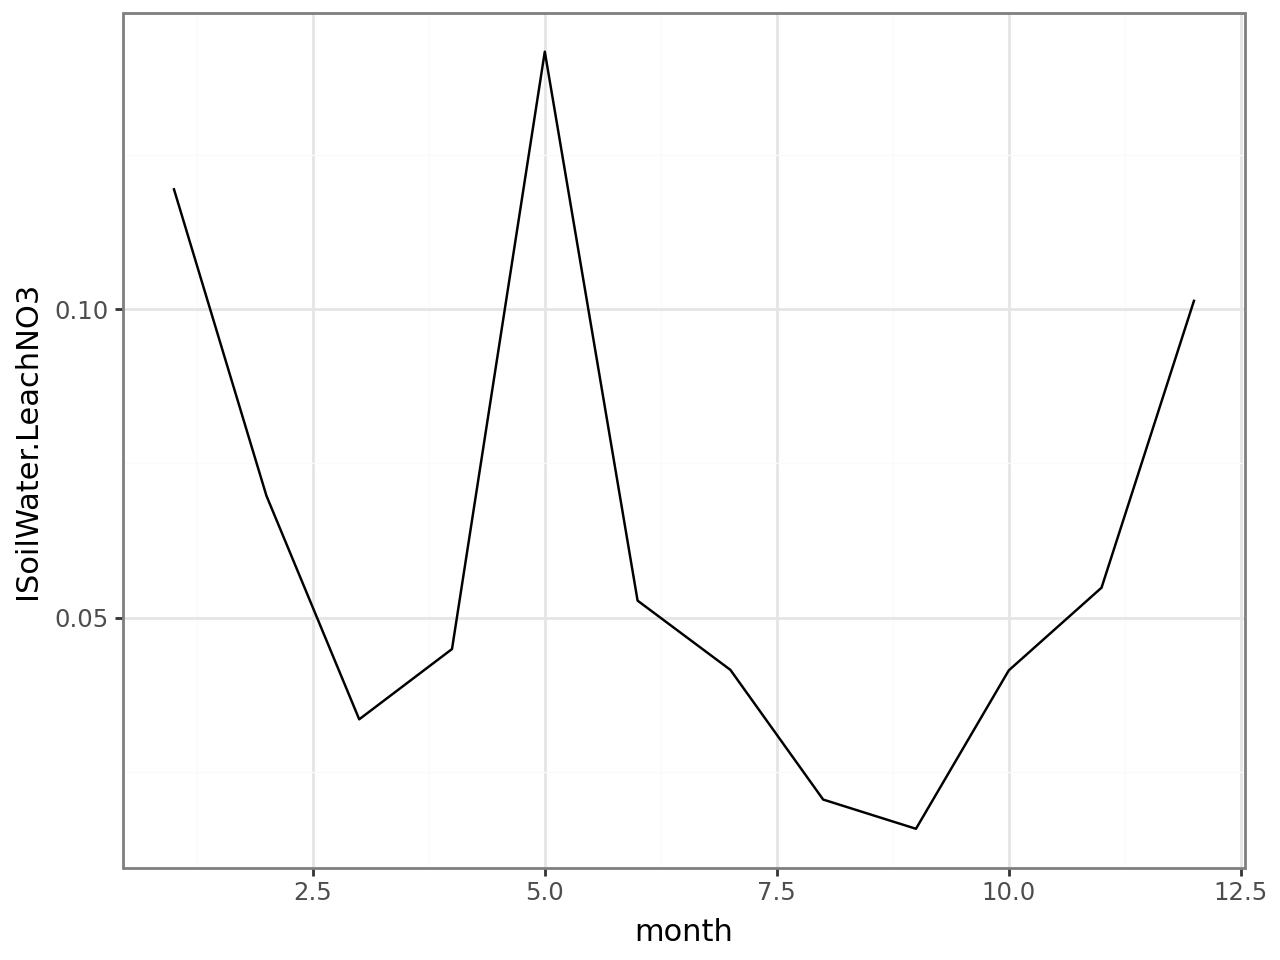

In [42]:
leach_results=results.groupby('month')['ISoilWater.LeachNO3'].mean().reset_index()

leach_plot=(
    ggplot(leach_results,aes(x='month',y='ISoilWater.LeachNO3'))+
    geom_line()+
    theme_bw()
)
leach_plot